## HW_3

Классы и наследование

Как правило задачи про классы не носят вычислительный характер. Обычно нужно написать классы, которые отвечают определенным интерфейсам. Насколько удобны эти интерфейсы и как сильно связаны классы между собой, определит легкость их использования в будущих программах.

Предположим есть данные о разных автомобилях и спецтехнике. Данные представлены в виде таблицы с характеристиками. Вся техника разделена на три вида: *спецтехника, легковые и грузовые автомобили*. Обратите внимание на то, что некоторые характеристики присущи только определенному виду техники. Например, у легковых автомобилей есть характеристика «кол-во пассажирских мест», а у грузовых автомобилей — габариты кузова: «длина», «ширина» и «высота».

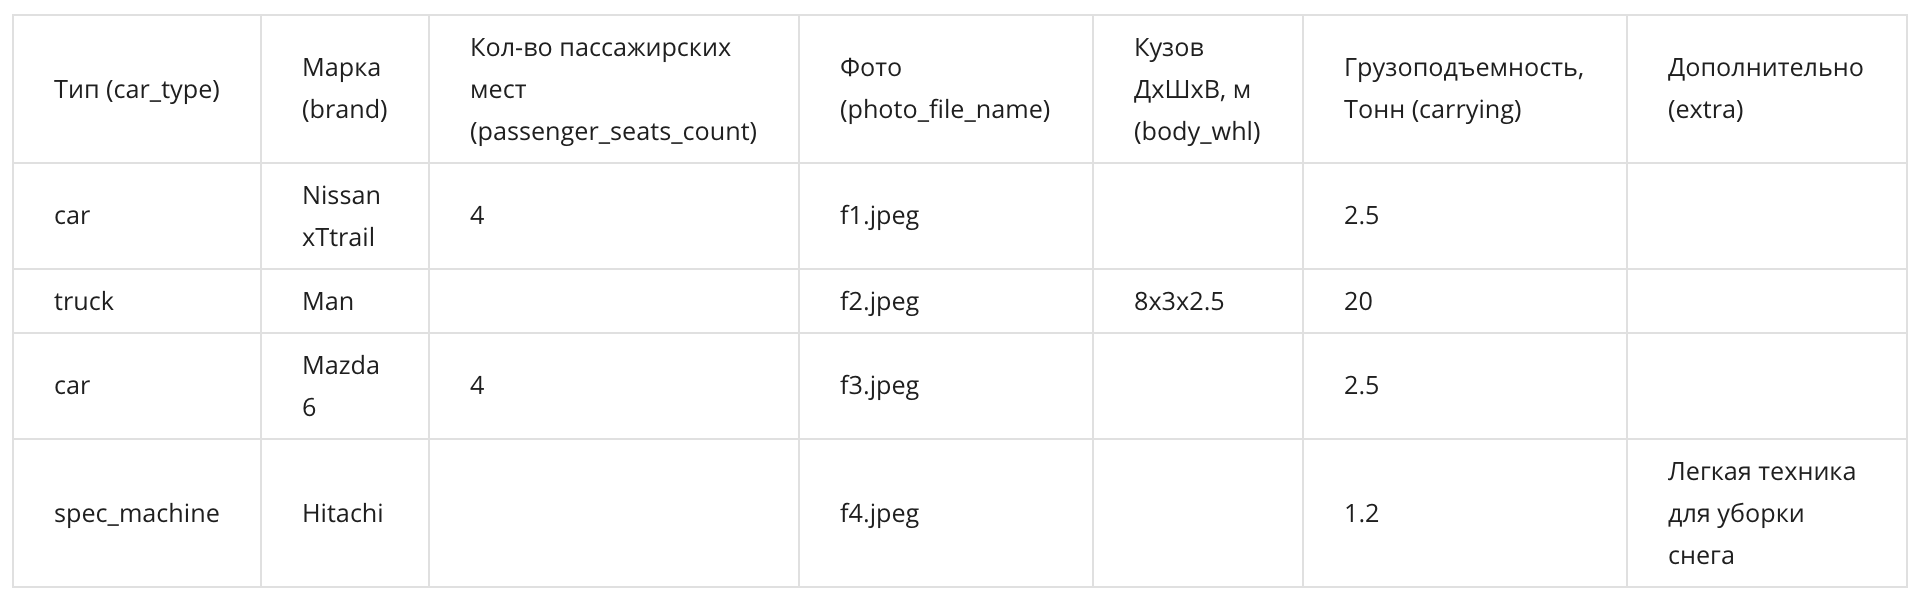

Вам необходимо создать свою иерархию классов для данных, которые описаны в таблице. Классы должны называться **CarBase** (базовый класс для всех типов машин), **Car** (легковые автомобили), **Truck** (грузовые автомобили) и **SpecMachine** (спецтехника). Все объекты имеют обязательные атрибуты:

- *car_type*, значение типа объекта и может принимать одно из значений: «car», «truck», «spec_machine».

- *photo_file_name*, имя файла с изображением машины, допустимы названия файлов изображений с расширением из списка: «.jpg», «.jpeg», «.png», «.gif»

- *brand*, марка производителя машины

- *carrying*, грузоподъемность

В базовом классе **CarBase** нужно реализовать метод *get_photo_file_ext* для получения расширения файла изображения. Расширение файла можно получить при помощи os.path.splitext.

Для грузового автомобиля необходимо в конструкторе класса определить атрибуты: **body_length**, **body_width**, **body_height**, отвечающие соответственно за габариты кузова — длину, ширину и высоту. Габариты передаются в параметре **body_whl** (строка, в которой размеры разделены латинской буквой «x»). Обратите внимание на то, что характеристики кузова должны быть вещественными числами и характеристики кузова могут быть не валидными (например, пустая строка). В таком случае всем атрибутам, отвечающим за габариты кузова, присваивается значение равное нулю.

Также для класса грузового автомобиля необходимо реализовать метод *get_body_volume*, возвращающий объем кузова.

В классе **Car** должен быть определен атрибут *passenger_seats_count* (количество пассажирских мест), а в классе **SpecMachine** — *extra* (дополнительное описание машины).

Полная информация о атрибутах классов приведена в таблице ниже, где 1 - означает, что атрибут обязателен для объекта, 0 - атрибут должен отсутствовать.

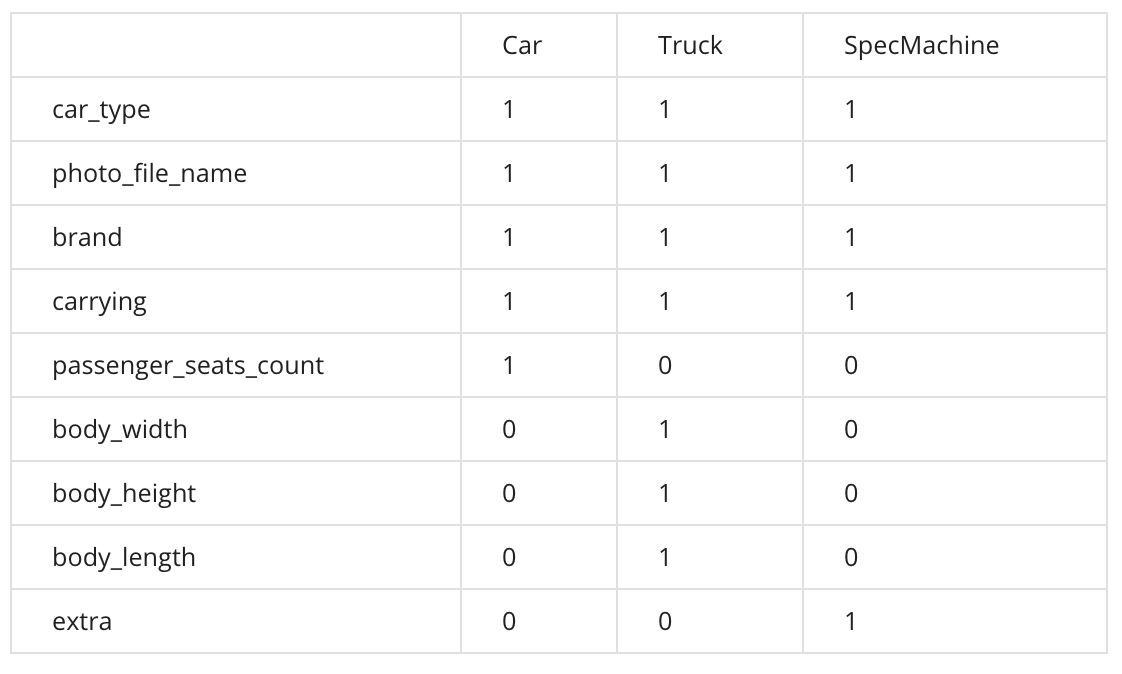

In [ ]:
!wget https://gist.githubusercontent.com/NooblyRand0m/404c8a252f89862654c3fa6bba3d8bc3/raw/26c97aa3876ef33f3509e3b1209402c5c138f06c/coursera_week3_cars.csv

--2020-11-20 16:07:08--  https://gist.githubusercontent.com/NooblyRand0m/404c8a252f89862654c3fa6bba3d8bc3/raw/26c97aa3876ef33f3509e3b1209402c5c138f06c/coursera_week3_cars.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287 [text/plain]
Saving to: ‘coursera_week3_cars.csv’

coursera_week3_cars 100%[===================>]     287  --.-KB/s    in 0s      

2020-11-20 16:07:08 (12.4 MB/s) - ‘coursera_week3_cars.csv’ saved [287/287]



In [ ]:
!head coursera_week3_cars.csv

car_type;brand;passenger_seats_count;photo_file_name;body_whl;carrying;extra
car;Nissan xTtrail;4;f1.jpeg;;2.5;
truck;Man;;f2.png;8x3x2.5;20;
truck;Man;;f2.png;;20;
car;Mazda 6;4;f3.jpeg;;2.5;
;;;
spec_machine;Hitachi;;f4;;1.2;Легкая техника для уборки снега



Обратите внимание, что у каждого объекта из иерархии должен быть свой набор атрибутов и методов. Например, у класса легковой автомобиль не должно быть метода *get_body_volume* в отличие от класса грузового автомобиля. Имена атрибутов и методов должны совпадать с теми, что описаны выше.

Далее вам необходимо реализовать функцию *get_car_list*, на вход которой подается имя файла в формате csv. Файл содержит данные, аналогичные строкам из таблицы. Вам необходимо прочитать этот файл построчно при помощи модуля стандартной библиотеки csv. Затем проанализировать строки на валидность и создать список объектов с автомобилями и специальной техникой. Функция должна возвращать список объектов.

Вы можете использовать для отладки работы функции *get_car_list* следующий csv-файл:

coursera_week3_cars.csv

Первая строка в исходном файле — это заголовок csv, который содержит имена колонок. Нужно пропустить первую строку из исходного файла. Обратите внимание на то, что в некоторых строках исходного файла , данные могут быть заполнены некорректно, например, отсутствовать обязательные поля или иметь не валидное значение. В таком случае нужно проигнорировать подобные строки и не создавать объекты. Строки с пустым или не валидным значением для body_whl игнорироваться не должны.  Вы можете использовать стандартный механизм обработки исключений в процессе чтения, валидации и создания объектов из строк csv-файла. Проверьте работу вашего кода с входным файлом, прежде чем загружать задание для оценки.

In [ ]:
import csv
csv_filename = '...'

with open(csv_filename) as csv_fd:
    reader = csv.reader(csv_fd, delimiter=';')
    next(reader)  # пропускаем заголовок
    for row in reader:
        print(row)

In [ ]:
class CarBase:
    def __init__(self, brand, photo_file_name, carrying):
        pass


class Car(CarBase):
    def __init__(self, brand, photo_file_name, carrying, passenger_seats_count):
        pass


class Truck(CarBase):
    def __init__(self, brand, photo_file_name, carrying, body_whl):
        pass


class SpecMachine(CarBase):
    def __init__(self, brand, photo_file_name, carrying, extra):
        pass


def get_car_list(csv_filename):
    car_list = []
    return car_list

## Базовые проверки

In [ ]:
car = Car('Bugatti Veyron', 'bugatti.png', '0.312', '2')
print(car.car_type, car.brand, car.photo_file_name, car.carrying, car.passenger_seats_count, sep='\n')
# car
# Bugatti Veyron
# bugatti.png
# 0.312
# 2

In [ ]:
truck = Truck('Nissan', 'nissan.jpeg', '1.5', '3.92x2.09x1.87')
print(truck.car_type, truck.brand, truck.photo_file_name, truck.body_length, truck.body_width, truck.body_height, sep='\n')
# truck
# Nissan
# nissan.jpeg
# 3.92
# 2.09
# 1.87

In [ ]:
spec_machine = SpecMachine('Komatsu-D355', 'd355.jpg', '93', 'pipelayer specs')
print(spec_machine.car_type, spec_machine.brand, spec_machine.carrying, spec_machine.photo_file_name, spec_machine.extra, sep='\n')
# spec_machine
# Komatsu-D355
# 93.0
# d355.jpg
# pipelayer specs

In [ ]:
spec_machine.get_photo_file_ext()
# '.jpg'

In [ ]:
cars = get_car_list('cars_week3.csv')
len(cars)
# 4

In [ ]:
cars[0].passenger_seats_count
# 4

In [ ]:
cars[1].get_body_volume()
# 60.0

Критерии оценки: 
1. У каждого класса реализован требуемый функционал (в ините прописаны необходимые атрибуты, определены требуемые методы для каждого класса), классы могут быть не относледованы: 4 балла
2. Классы корректно наследуются: + 1 балл
3. На большую часть (больше половины) входных аргументов реализованы проверки типа и значения в соответствии с задачей и здравым смыслом: + 2 балла
4. Проверки реализованы не в каждом классе по отдельности (с дублированием кода), а в соответствии с наследованием (вспомним про метод super): + 1 балл
5. Файлик считывается построчно, строки разбиваются,аргументы передаются в классы, инициализация классов обернута в try-except: + 2 балла